# Convolutions (CNNs)
Artistas de romantismo (Goya x Delacroix)

## Autor:
* Nome: João Gabriel Elvas Ribeiro
* Matricula: 190109599
* Github: JoaoGElvas

## Objetivo:
Explorar e compreender a CNN, utilizando da distinção da arte de dois artistas de romantismo (Goya x Delacroix)

## Preparando o ambiente: 
Primeiro iremos instalar o duckduckgo_search para podermos encontrar as URLS de imagens.
Após isso iremos instalar a biblioteca do fastai.

In [84]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from fastai.vision.all import *
import cv2
from scipy import misc
i = misc.ascent()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import torch

In [ ]:
pip install -U duckduckgo_search

In [ ]:
pip install fastai

## Vendo o funcionamento de uma CNN

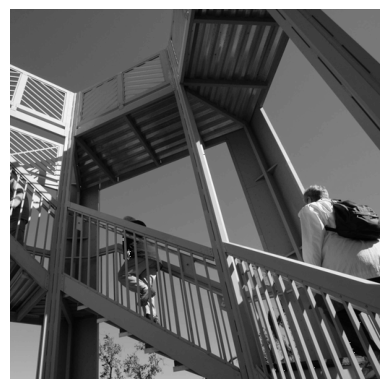

In [86]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

Pode-se ver que a imagem é uma escada com linhas verticais e horizontais fortes.

A imagem é armazenada como uma matriz NumPy, então pode-se criar a imagem transformada apenas copiando essa matriz. As variáveis size_x e size_y conterão as dimensões da imagem para que possa-se repeti-la mais tarde.

Crie-se uma matriz de convolução (ou kernel) como uma matriz 3x3:

In [92]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [87]:
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight  = 1

Calcula-se os pixels de saída. 

Itere na imagem, deixando uma margem de 1 pixel e multiplica cada um dos vizinhos do pixel atual pelo valor definido no filtro.

Isso significa que o vizinho do pixel atual acima e à esquerda será multiplicado pelo item superior esquerdo no filtro. Em seguida, multiplica o resultado pelo peso e verifica se ele está no intervalo de 0 a 255.

In [93]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

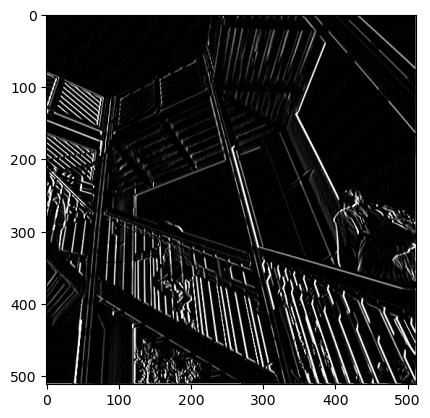

In [94]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()   

Assim como as convoluções, o pooling ajuda na detecção de recursos. As camadas de pool reduzem a quantidade total de informações em uma imagem e mantêm os recursos detectados como presente.

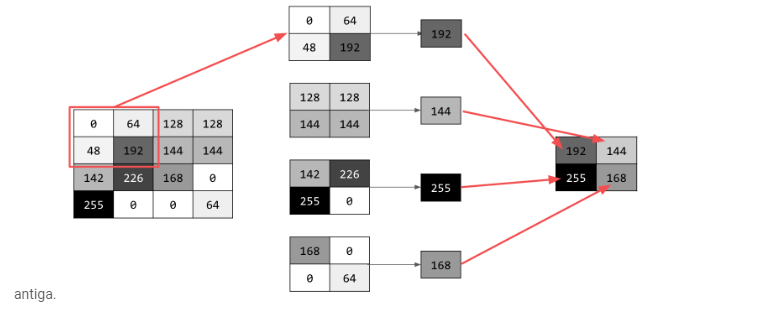

O código a seguir mostra um pooling (2, 2).
Embora a imagem tenha um quarto do tamanho do original, todos os recursos foram mantidos.

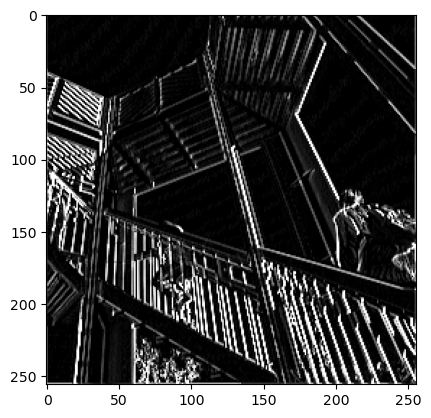

In [95]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 

plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

In [ ]:
O código a seguir mostra um pooling (2, 2). Execute-o para ver a saída.

Você verá que, embora a imagem tenha um quarto do tamanho do original, todos os recursos foram mantidos.

## Obtendo as primeiras imagens 
Será utilizado o duckduckgo para encontrarmos as primeiras imagens.
Será utilizado o fastdownload para realizar o download de imagens.

In [74]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term: str, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [75]:
urls = search_images('goyaarts', max_images=1)
urls[0]

Searching for 'goyaarts'


/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://images.fineartamerica.com/images/artworkimages/mediumlarge/3/the-witches-sabbath-francisco-de-goya.jpg'

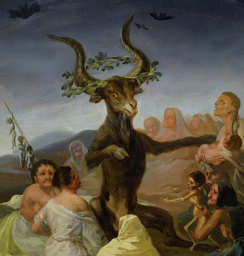

In [76]:
from fastdownload import download_url
dest = 'goyaarts.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'delacroixart'


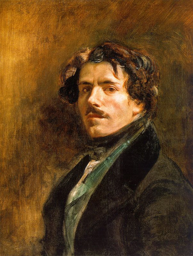

In [77]:
download_url(search_images('delacroixart', max_images=1)[0], 'delacroixart.jpg', show_progress=False)
Image.open('delacroixart.jpg').to_thumb(256,256)

A seguri iremos utilizar o código abaixo para realizar o dowload de alguns grupos de imagens para treinamento.


**Obs:** O comando *sleep(10)* é utilizado para gerar uma pausa entre as pesquisas, assim evitando sobrecarregar o servidor

In [78]:
searches = 'goyaarts','delacroixart'
path = Path('goyaarts_or_delacroixart')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'goyaarts photo'
Searching for 'goyaarts sun photo'
Searching for 'goyaarts shade photo'
Searching for 'delacroixart photo'
Searching for 'delacroixart sun photo'
Searching for 'delacroixart shade photo'


Nessa etapa vai ser verificado se as imagens foram baixadas corretamente, as que apresentarem problemas serão excluídas.

In [79]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

A fim de desenvolver um modelo para realizar previsões, é preciso contar com os DataLoaders. DataLoaders são objetos que têm um conjunto de treinamento (imagens utilizadas para construir o modelo) e um conjunto de validação (imagens empregadas para avaliar a acurácia do modelo).

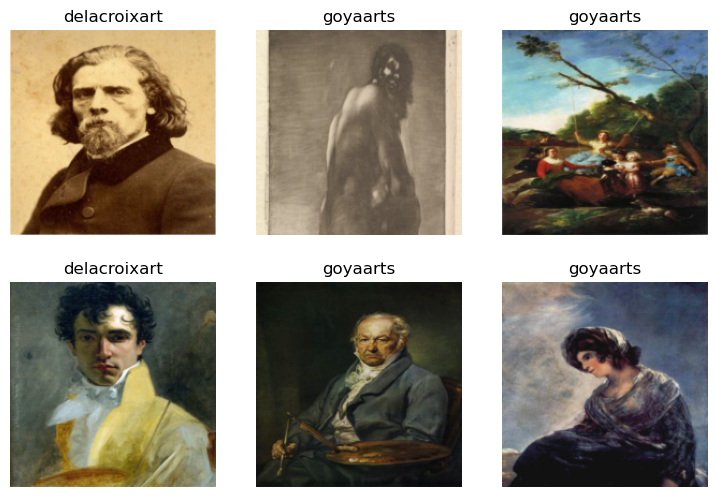

In [80]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

## Parâmetros utilizados:

* blocks: Como estamos utilizando imagens como inputs é neccesario utilizar o ImageBlocks. Já nossos outputs são categorias.
* get-items: A função get_image_files é utilizada para encontrarmos os nossos inputs.
* splitter: Com a finalidade de treinar melhor nosso programa vamos dividir os dades em treinamento e validação. O comando splitter tem essa função. Neste caso, estamos dividindo em 20% para validação e não serão usados dados no treinamento.
* get_y: Utilizado para vincular cada imagem com um rotulo correspondente à pasta em que está localizada.
* item_tfms: Essa operação irá redimensionar as imagens para 192 pixels, utilizando o método "squish". Que seria algo com esmagar a imagem.

## Deployment

In [82]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.481669,1.566887,0.441176,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.642648,0.441848,0.176471,00:22
1,0.494668,0.165950,0.058824,00:14
2,0.349206,0.182408,0.058824,00:14
3,0.262556,0.193642,0.088235,00:14
4,0.202222,0.206170,0.117647,00:14


In [83]:
learn.export('model.pkl')

Neste link do HuggingFace poderemos encontrar o aplicativo/website criado com o gradio nesse artigo.
https://huggingface.co/spaces/JoaoElvas/CNNart